In [1]:
import platform
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.nanops import bottleneck_switch

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_residuals_subdets_with_err, get_rays_in_sub_det_vectorized, get_rays_in_sub_det, get_raw_residuals, get_circle_scan, plot_2D_circle_scan

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dphnpct50.extra.cea.fr':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 5  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'p2-3_metal_arco2_gas_test_9-10-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'drift_850'

det_single = 'p2_3'

file_nums = 'all'

noise_sigma = 8

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'


In [3]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [4]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, noise_sigma, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')
print(f'Hits shape: {det.dream_data.hits.shape}')

Error: Detector type p2 not found in det map types.
FEU Num: 6
FEU Channels: [1, 2]
HV: {'drift': 850, 'mesh_1': 460}
Reading in data...


100%|██████████| 1/1 [00:05<00:00,  5.22s/it]


Read in data shape: (22890, 128, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 97.20it/s]


Fitting time: 0.2514042854309082 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
Hits shape: (22890, 128)


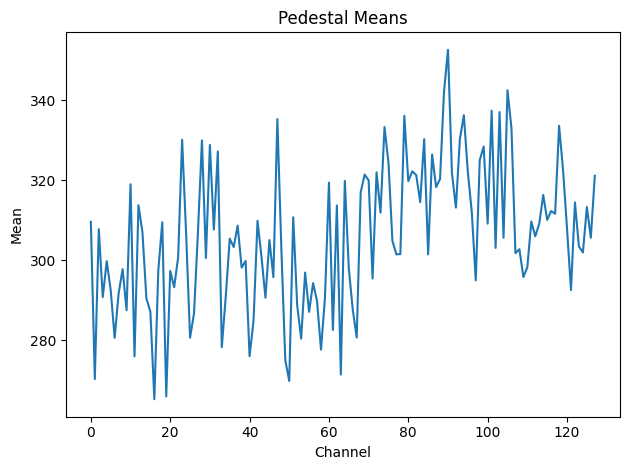

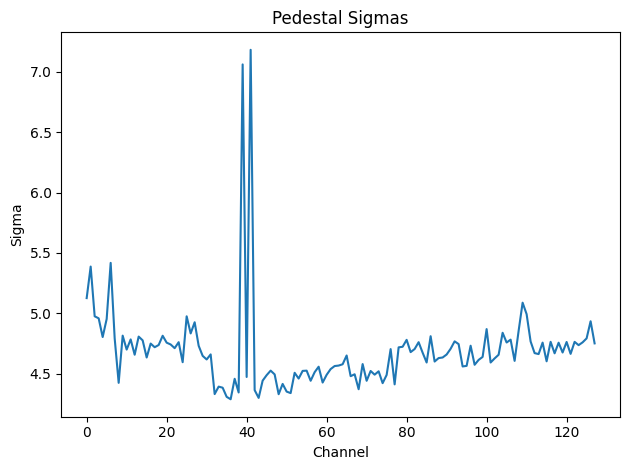

In [5]:
det.dream_data.plot_pedestals()

C:\Users\Dylan\PycharmProjects\saclay_micromegas\Detector_Classes\DreamData.py:764: RuntimeWarning: All-NaN slice encountered
  event_max_amps = np.nanmax(self.data_amps, axis=1)


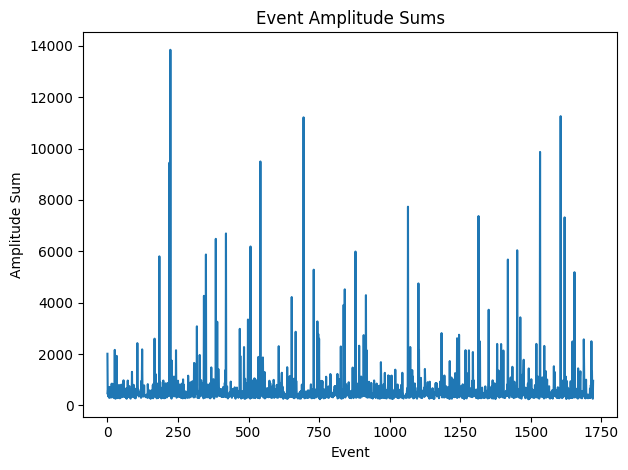

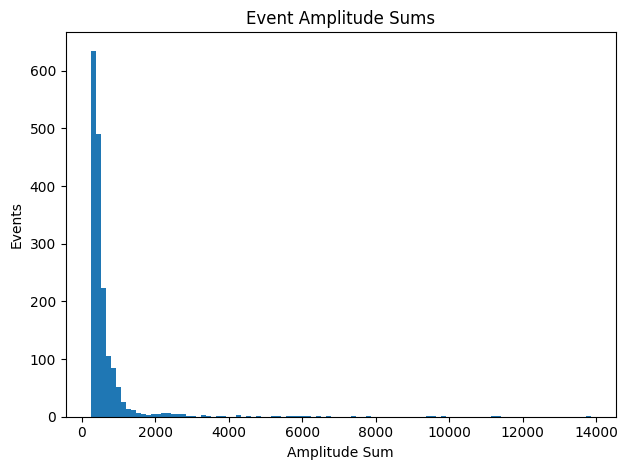

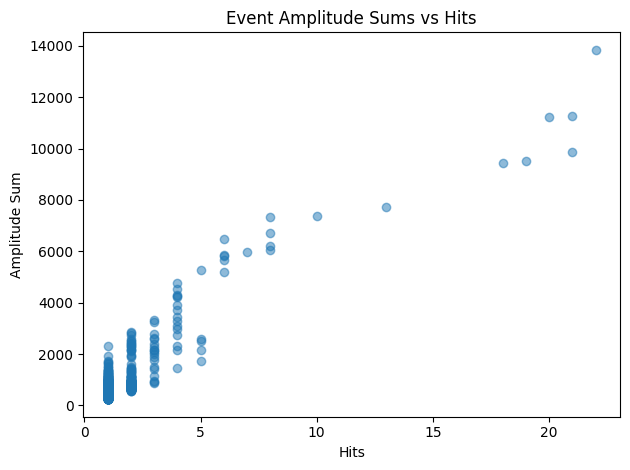

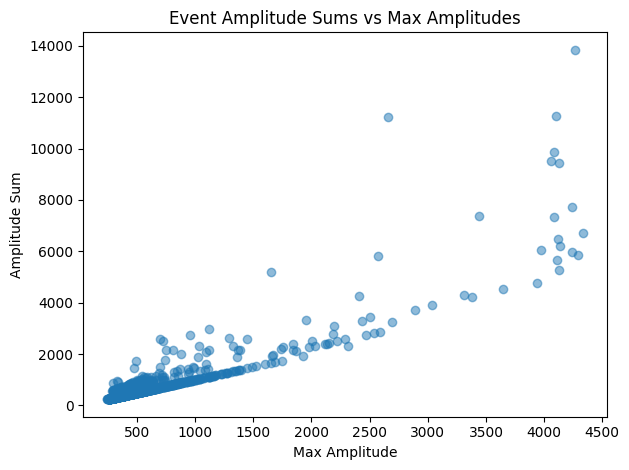

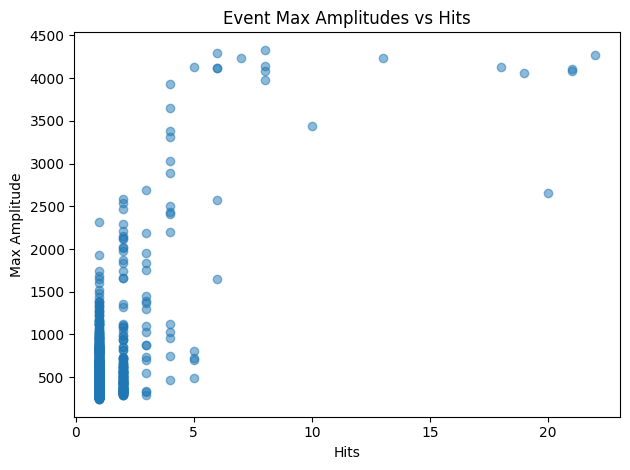

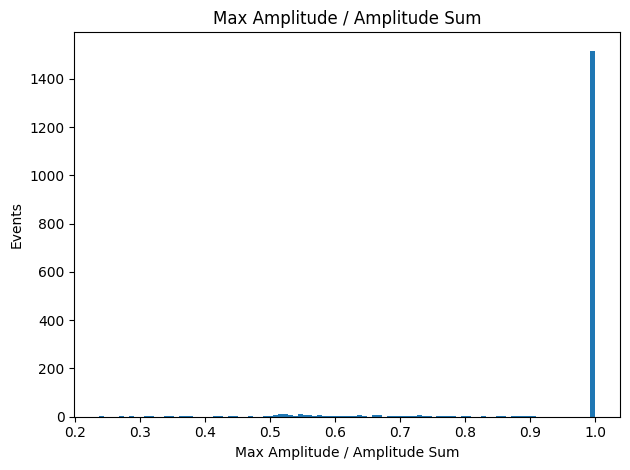

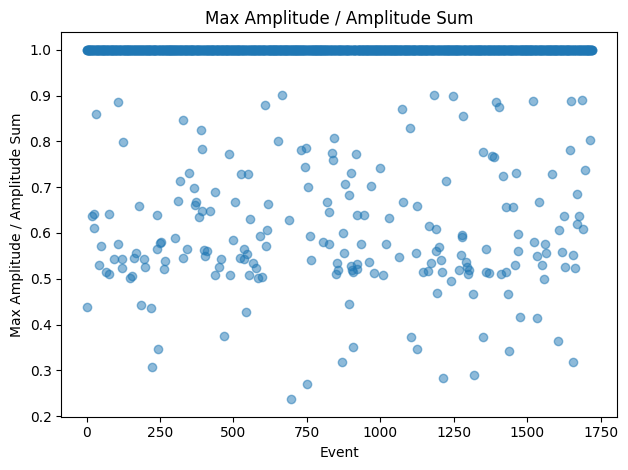

In [6]:
det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: [32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 49 50 51 53 54 55 56 57 58
 59 60 61 62 63]
Connector 2 Dead Strips: []


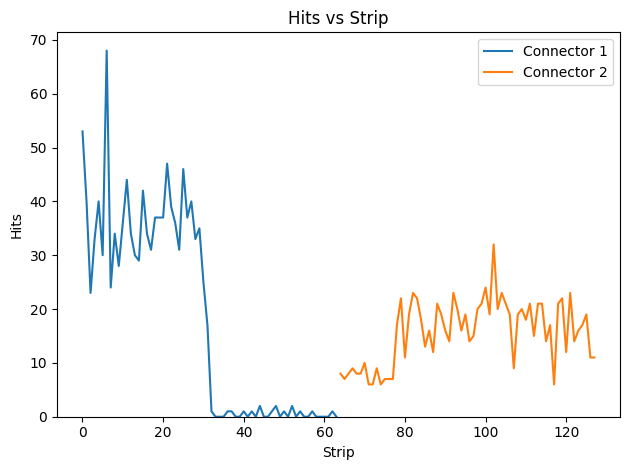

In [7]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

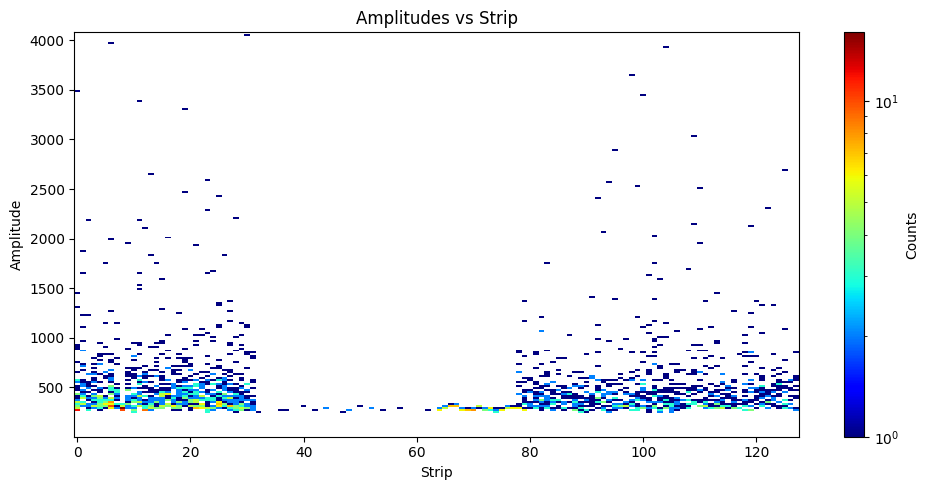

In [8]:
det.dream_data.plot_amplitudes_vs_strip()

In [9]:
print(len(det.dream_data.hits))

22890


Text(0.5, 1.0, 'Time of Max P2 Pads')

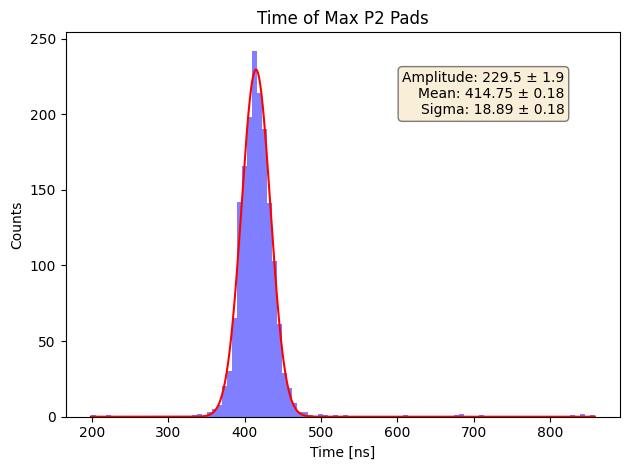

In [10]:
det.dream_data.correct_for_fine_timestamps()

sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, plot=True)
plt.title(f'Time of Max P2 Pads')

Text(0.5, 1.0, 'Time of Max for P2 Pads Min Amp 600')

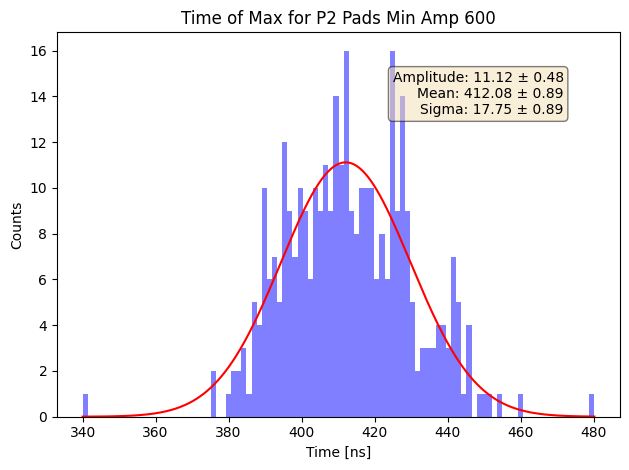

In [11]:
min_amp = 600
sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=min_amp, plot=True)
plt.title(f'Time of Max for P2 Pads Min Amp {min_amp}')